# Students Performance in Exams 

Dataset from Kaggle:
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

This data set consists of the marks secured by the students in various subjects.

### Questions we'll try to answer from the data:
1. Gender:
    - Who has higher average scores? Males or females?
    - Who is scoring higher per test topic?
2. Test Prep:
    - Does whether a studen did test prep courses affect their average test scores?
    - Does it benefit either gender more?
    - Does benefit students score better in certain tests? If so, which tests?
3. Parent's Education:
    - Does the higher the parent's education, the higher their kids' scores?
    - Does the parent's education affect certain tests more than others?
    - Does it affect one gender over the other?

4. Race:
    - Does race seem to affect test scores?
    - If so how?

5. Lunch:
    - Does the type of lunch taken by a student affect their score?

6. A combination of all factors:
    - Looking at all factors together, which factor have the highest weight in driving students score?
    - Does it vary by gender/test type?

## First, let's import necessary libraries and set the style for the visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
style.use('fivethirtyeight')

# Exploring the data

In [2]:
tests = pd.read_csv('StudentsPerformance.csv')
tests.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- There are no null values. Column names need to be cleaned and shortened.

In [4]:
#Creating shorter, easier to type column names
new_columns = ['gender', 'race', 'parent_ed', 'lunch', 'prep_course', 'math', 'reading', 'writing']

#assigning new column names
tests.columns = new_columns

tests.head(1)

,gender,race,parent_ed,lunch,prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74


## Exploring columns
looping through columns exploring value counts for each

In [5]:
for c in tests.columns:
    print(f"Value counts for column {c} is: ")
    print(tests[c].value_counts())
    print() #to leave an empty line after each column for readability
    

Value counts for column gender is: 
gender
female    518
male      482
Name: count, dtype: int64

Value counts for column race is: 
race
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Value counts for column parent_ed is: 
parent_ed
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Value counts for column lunch is: 
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Value counts for column prep_course is: 
prep_course
none         642
completed    358
Name: count, dtype: int64

Value counts for column math is: 
math
65    36
62    35
69    32
59    32
73    27
      ..
24     1
26     1
19     1
23     1
8      1
Name: count, Length: 81, dtype: int64

Value counts for column reading is: 
reading
72    34
74    33
64    32
73    30
67    30
      ..
32     1
26     1
28     1
23  

# Visualizing the data
- Let's first explore the distribution of scores for Math, Reading and writing

In [6]:
tests.head(1)

,gender,race,parent_ed,lunch,prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74


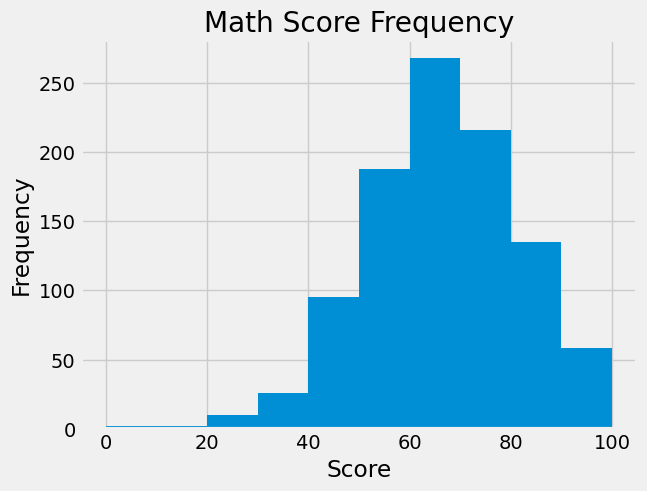

Text(0.5, 1.0, 'Writing')

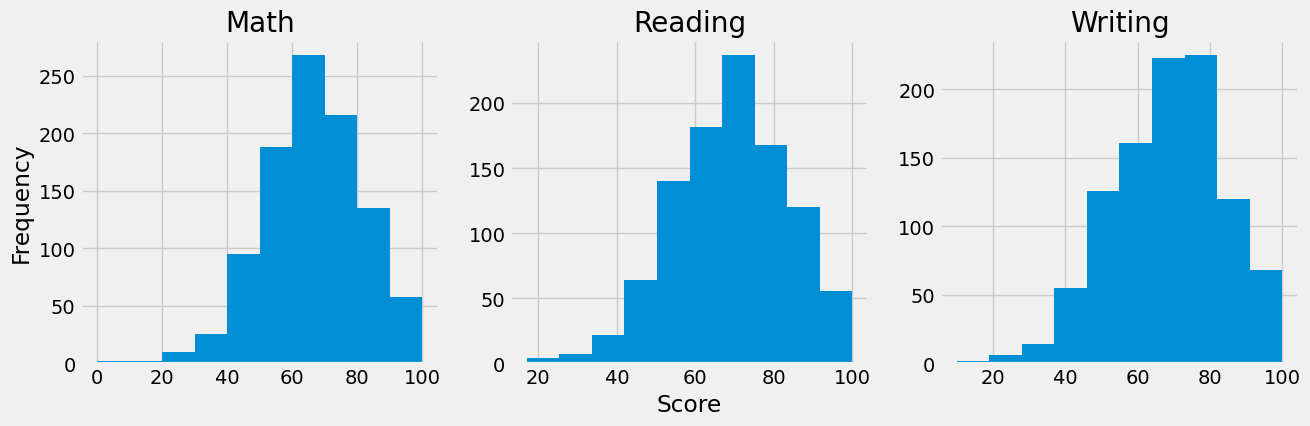

In [52]:
tests['math'].plot.hist(title='Math Score Frequency', xlabel = 'Score')
plt.show()
fig, ax = plt.subplots(1,3,figsize = (14,4))
ax[0].hist(tests['math'])
#ax[0].set_xlabel('Score')
ax[0].set_title('Math')
ax[0].set_ylabel('Frequency')

ax[1].hist(tests['reading'])
ax[1].set_xlabel('Score')
ax[1].set_title('Reading')

ax[2].hist(tests['writing'])
ax[2].set_title('Writing')


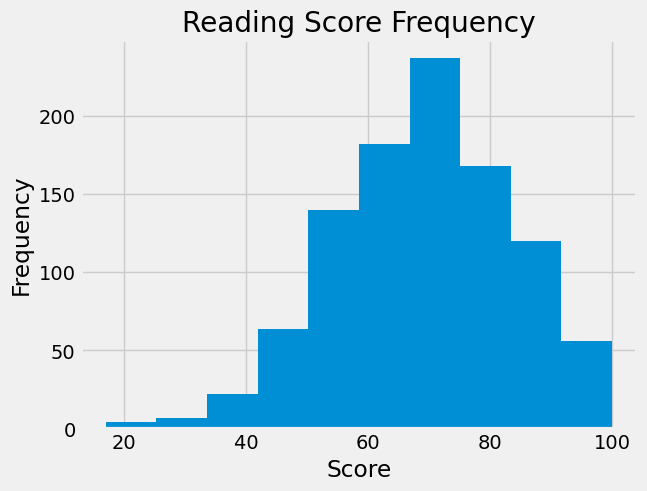

In [8]:
tests['reading'].plot.hist(title='Reading Score Frequency', xlabel = 'Score')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

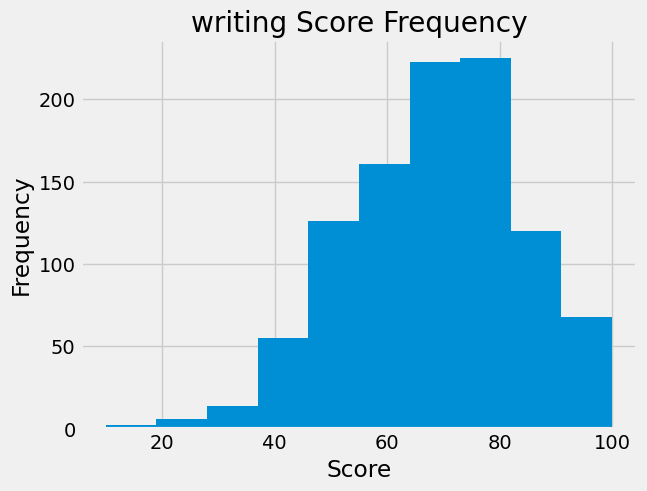

In [9]:
tests['writing'].plot.hist(title='writing Score Frequency', xlabel = 'Score')
plt.show

- Let's see how the data splits by gender

In [10]:
#grouping by `gender`
gender_group = tests.groupby('gender') 

#creating female and male groupings
female = gender_group.get_group('female')
male = gender_group.get_group('male')

- Now let's take a look at:
    - Mean
    - Minimum
    - Maximum
    - Median test scores for each gender

In [11]:
female_scores = female[['math', 'reading', 'writing']]
female_avg_scores = female_scores.agg(['mean', 'min', 'max', 'median'])
print("Female Scores")
female_avg_scores
    

Female Scores


,math,reading,writing
mean,63.633205,72.608108,72.467181
min,0.000000,17.000000,10.000000
max,100.000000,100.000000,100.000000
median,65.000000,73.000000,74.000000


In [12]:
male_scores = male[['math', 'reading', 'writing']]
male_avg_scores = male_scores.agg(['mean', 'min', 'max', 'median'])
print("Male Scores")
m_median_math = male_avg_scores.loc['median', 'math']
m_median_read = male_avg_scores.loc['median', 'reading']
m_median_writing = male_avg_scores.loc['median', 'writing']
male_avg_scores

Male Scores


,math,reading,writing
mean,68.728216,65.473029,63.311203
min,27.000000,23.000000,15.000000
max,100.000000,100.000000,100.000000
median,69.000000,66.000000,64.000000


- Let's try to plot test scores, by gender with mean and median overlayed

In [13]:
#Creating variables for medians
m_math_median = male_avg_scores.loc['median', 'math']
m_read_median =  male_avg_scores.loc['median', 'reading']
m_write_median =  male_avg_scores.loc['median', 'writing']

f_math_median = female_avg_scores.loc['median', 'math']
f_read_median =  female_avg_scores.loc['median', 'reading']
f_write_median =  female_avg_scores.loc['median', 'writing']

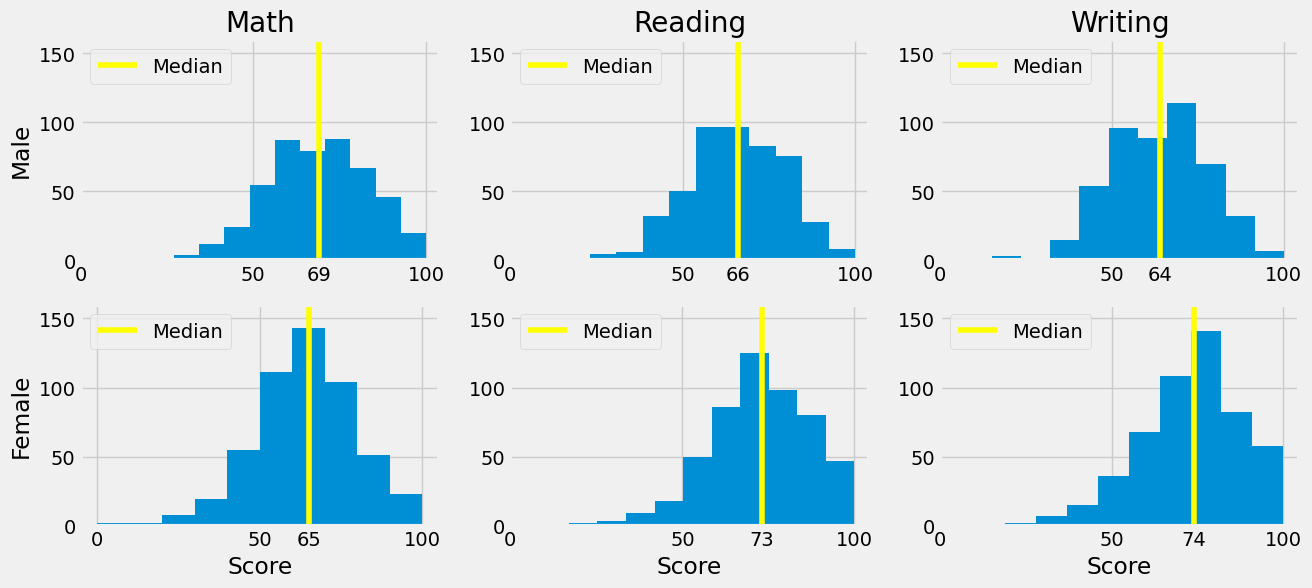

In [14]:
plt.figure(figsize=(14,6))

#Male plots

plt.subplot(2,3,1)
plt.hist(male['math'])
plt.xticks([0,50,100, m_math_median])
plt.yticks([0,50,100, 150])
plt.ylim(0,160) #adding y limits for easier comparision 
plt.ylabel('Male')
plt.title('Math')
plt.axvline(m_math_median, c='yellow')
plt.legend(['Median'], loc='upper left')
#m_median_math


plt.subplot(2,3,2)
plt.hist(male['reading'])
plt.xticks([0,100,50, m_read_median])
plt.yticks([0,50,100, 150]) 
plt.ylim(0,160) #adding y limits for easier comparision 
plt.title('Reading')
plt.axvline(m_read_median, c='yellow')
plt.legend(['Median'], loc='upper left')


plt.subplot(2,3,3)
plt.hist(male['writing'])
plt.xticks([0,50,100, m_write_median])
plt.yticks([0,50,100, 150])
plt.ylim(0,160) #adding y limits for easier comparision 
plt.title('Writing')
plt.axvline(m_write_median, c='yellow')
plt.legend(['Median'], loc='upper left')

#Female Plots
plt.subplot(2,3,4)
plt.hist(female['math'])
plt.ylabel('Female')
plt.xlabel('Score')
plt.xticks([0,100,50, f_math_median])
plt.yticks([0,50,100, 150])
plt.ylim(0,160) #adding y limits for easier comparision 
plt.axvline(f_math_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(2,3,5)
plt.hist(female['reading'])
plt.xlabel('Score')
plt.xticks([0,100,50, f_read_median])
plt.yticks([0,50,100, 150])
plt.ylim(0,160) #adding y limits for easier comparision 
plt.axvline(f_read_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(2,3,6)
plt.hist(female['writing'])
plt.xlabel('Score')
plt.xticks([0,100,50, f_write_median])
plt.yticks([0,50,100, 150])
plt.ylim(0,160) #adding y limits for easier comparision 
plt.axvline(f_write_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.show()

# Observations
- Males have a higer median Math score than females
- Females have higher median scores in Reading and Writing

### next, let's dive deeper into what/if other factors affect test scores

# Test Prep
### Does test prep have an effect on test scores?

In [15]:
tests.head(1)

,gender,race,parent_ed,lunch,prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74


In [16]:
#grouping by `prep_course`
prep_group = tests.groupby('prep_course') 

#creating prep and no_prep groupings
prep = prep_group.get_group('completed')
no_prep = prep_group.get_group('none')


#Calculating Averages

#Prep
prep_scores = prep[['math', 'reading', 'writing']]
prep_avg_scores = prep_scores.agg(['mean', 'min', 'max', 'median'])
print("Test Prep Scores")
prep_avg_scores

Test Prep Scores


,math,reading,writing
mean,69.695531,73.893855,74.418994
min,23.000000,37.000000,36.000000
max,100.000000,100.000000,100.000000
median,69.000000,75.000000,76.000000


In [17]:
#No Prep
no_prep_scores = no_prep[['math', 'reading', 'writing']]
no_prep_avg_scores = no_prep_scores.agg(['mean', 'min', 'max', 'median'])
print("No Test Prep Scores")
no_prep_avg_scores

No Test Prep Scores


,math,reading,writing
mean,64.077882,66.534268,64.504673
min,0.000000,17.000000,10.000000
max,100.000000,100.000000,100.000000
median,64.000000,67.000000,65.000000


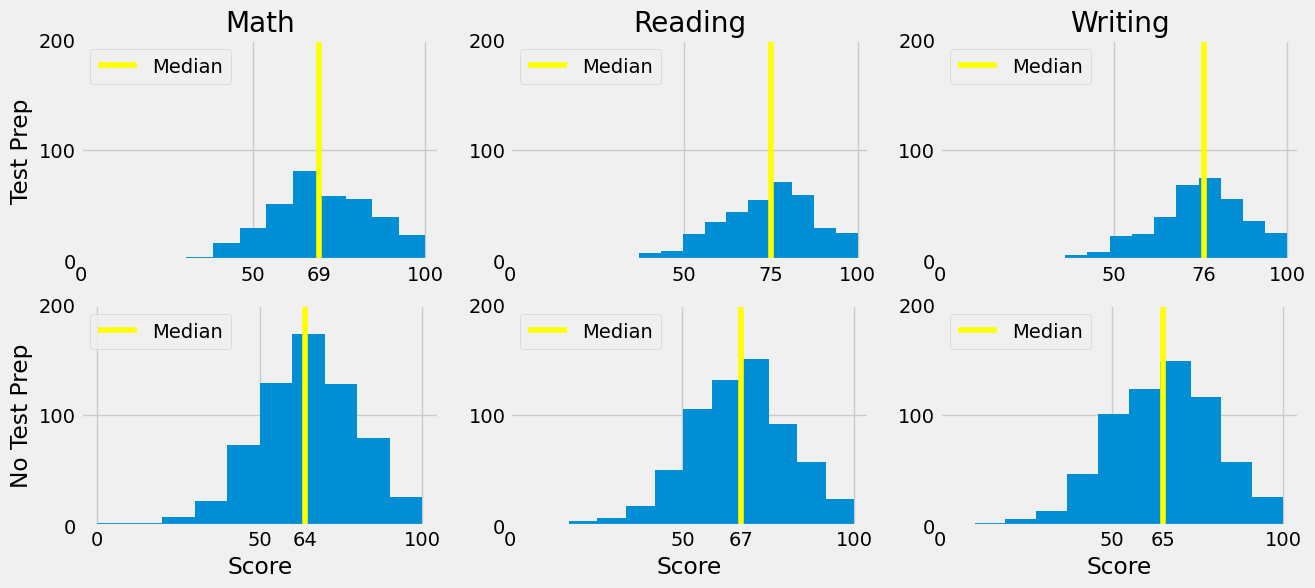

In [18]:
#Creating variables for medians
p_math_median = prep_avg_scores.loc['median','math']
p_read_median = prep_avg_scores.loc['median','reading']
p_write_median = prep_avg_scores.loc['median','writing']
np_math_median = no_prep_avg_scores.loc['median','math']
np_read_median = no_prep_avg_scores.loc['median','reading']
np_write_median = no_prep_avg_scores.loc['median','writing']



plt.figure(figsize=(14,6))

#Test Prep plots

plt.subplot(2,3,1)
plt.hist(prep['math'])
plt.xticks([0,100,50, p_math_median])
plt.yticks([0,100,200])
plt.ylim(0,200) #adding y limits for easier comparision 
plt.ylabel('Test Prep')
plt.title('Math')
plt.axvline(prep_avg_scores.loc['median', 'math'], c='yellow')
plt.legend(['Median'], loc='upper left')
#m_median_math


plt.subplot(2,3,2)
plt.hist(prep['reading'])
plt.xticks([0,100,50, p_read_median])
plt.yticks([0,100,200])
plt.ylim(0,200) #adding y limits for easier comparision 
plt.title('Reading')
plt.axvline(prep_avg_scores.loc['median', 'reading'], c='yellow')
plt.legend(['Median'], loc='upper left')


plt.subplot(2,3,3)
plt.hist(prep['writing'])
plt.xticks([0,100,50, p_write_median])
plt.yticks([0,100,200])
plt.ylim(0,200) #adding y limits for easier comparision 
plt.title('Writing')
plt.axvline(prep_avg_scores.loc['median', 'writing'], c='yellow')
plt.legend(['Median'], loc='upper left')

#No Test Plots
plt.subplot(2,3,4)
plt.hist(no_prep['math'])
plt.ylabel('No Test Prep')
plt.xlabel('Score')
plt.xticks([0,100,50, np_math_median])
plt.yticks([0,100,200])
plt.ylim(0,200) #adding y limits for easier comparision 
plt.axvline(no_prep_avg_scores.loc['median', 'math'], c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(2,3,5)
plt.hist(no_prep['reading'])
plt.xlabel('Score')
plt.xticks([0,100,50, np_read_median])
plt.yticks([0,100,200])
plt.ylim(0,200) #adding y limits for easier comparision 
plt.axvline(no_prep_avg_scores.loc['median', 'reading'], c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(2,3,6)
plt.hist(no_prep['writing'])
plt.xlabel('Score')
plt.xticks([0,100,50,np_write_median])
plt.yticks([0,100,200])
plt.ylim(0,200) #adding y limits for easier comparision 
plt.axvline(no_prep_avg_scores.loc['median', 'writing'], c='yellow')
plt.legend(['Median'], loc='upper left')

plt.show()

# Observations 
- Majority of students do not take test prep for all tests
- The __median test score for all tests is higher for those students that take test prep___
- The average test score for math is the __same__ for students that took a test prep and those who didn't
- The average score for reading is __higher__ for students that took test prep
- The average score for writing is __higher__ for students that took test prep

## Exploring effect of parent's education on student's test score

In [19]:
tests['parent_ed'].value_counts()

parent_ed
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [20]:
#group by parent's education

parent_ed_grouped = tests.groupby('parent_ed')



#some high school
s_high_school = parent_ed_grouped.get_group('some high school')
s_high_school_scores = s_high_school[['math', 'reading', 'writing']]
s_high_school_avg = s_high_school_scores.agg(['mean', 'min', 'max', 'median'])
print('Some High School')
print(s_high_school_avg)


#high school
high_school = parent_ed_grouped.get_group('high school')
high_school_scores = high_school[['math', 'reading', 'writing']]
high_school_avg = high_school_scores.agg(['mean', 'min', 'max', 'median'])
print()
print('High School')
print(high_school_avg)


#some college
s_college = parent_ed_grouped.get_group('some college')
s_college_scores = s_college[['math', 'reading', 'writing']]
s_college_avg = s_college_scores.agg(['mean', 'min', 'max', 'median'])
print()
print('Some College')
print(s_college_avg)


#associate's degree
associate = parent_ed_grouped.get_group("associate's degree")
associate_scores = associate[['math', 'reading', 'writing']]
associate_avg = associate_scores.agg(['mean', 'min', 'max', 'median'])
print()
print("Associate's Degree")
print(associate_avg)


#bachelor's degree
bachelor = parent_ed_grouped.get_group("bachelor's degree")
bachelor_scores = bachelor[['math', 'reading', 'writing']]
bachelor_avg = bachelor_scores.agg(['mean', 'min', 'max', 'median'])
print()
print("Bachelor's Degree")
print(bachelor_avg)


#master's degree
master = parent_ed_grouped.get_group("master's degree")
master_scores = master[['math', 'reading', 'writing']]
master_avg = master_scores.agg(['mean', 'min', 'max', 'median'])
print()
print("Master's Degree")
print(master_avg)



Some High School
             math     reading     writing
mean    63.497207   66.938547   64.888268
min      0.000000   17.000000   10.000000
max     97.000000  100.000000  100.000000
median  65.000000   67.000000   66.000000

High School
             math    reading    writing
mean    62.137755  64.704082   62.44898
min      8.000000  24.000000   15.00000
max     99.000000  99.000000  100.00000
median  63.000000  66.000000   64.00000

Some College
              math     reading    writing
mean     67.128319   69.460177  68.840708
min      19.000000   23.000000  19.000000
max     100.000000  100.000000  99.000000
median   67.500000   70.500000  70.000000

Associate's Degree
              math     reading     writing
mean     67.882883   70.927928   69.896396
min      26.000000   31.000000   35.000000
max     100.000000  100.000000  100.000000
median   67.000000   72.500000   70.500000

Bachelor's Degree
              math  reading     writing
mean     69.389831     73.0   73.381356
mi

## Let's visualize those numbers

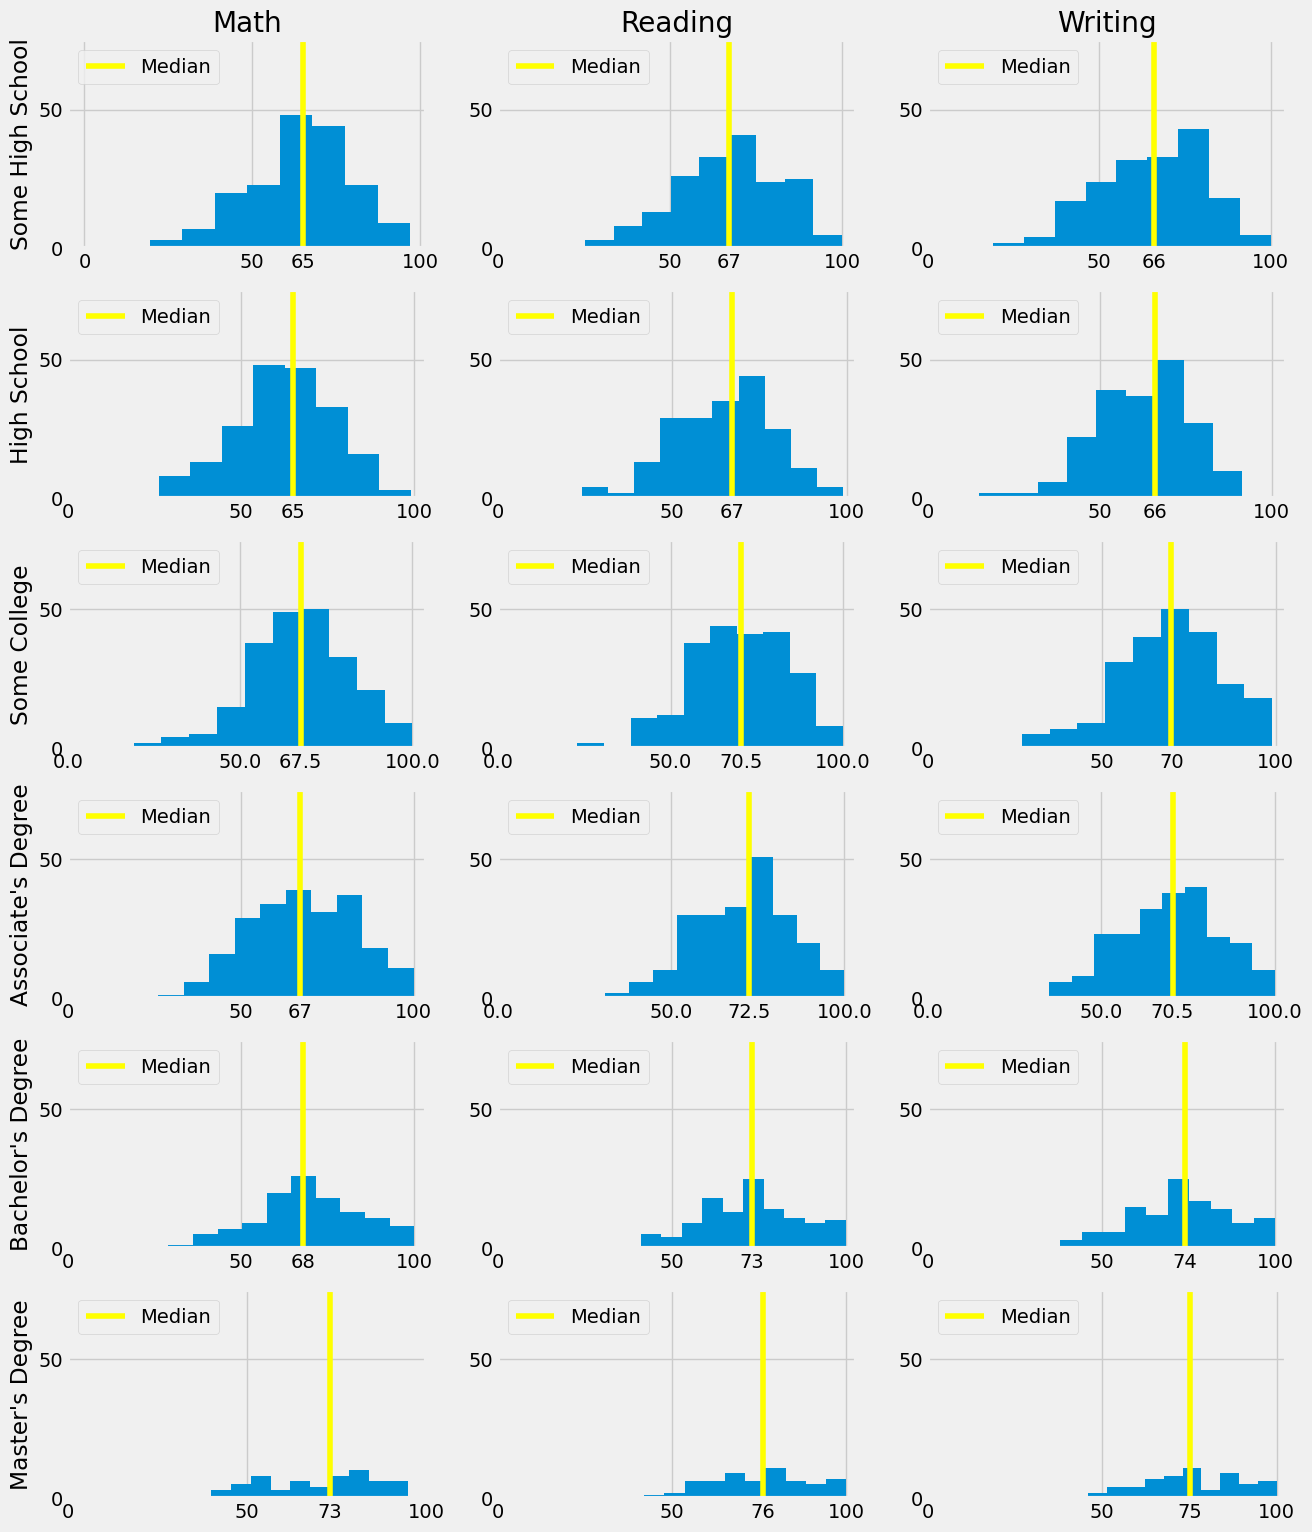

In [21]:
#Creating variables for medians

#Some high School
s_high_school_math_median = s_high_school_avg.loc['median', 'math']
s_high_school_read_median = s_high_school_avg.loc['median', 'reading']
s_high_school_write_median = s_high_school_avg.loc['median', 'writing']

#high school
high_school_math_median = s_high_school_avg.loc['median', 'math']
high_school_read_median = s_high_school_avg.loc['median', 'reading']
high_school_write_median = s_high_school_avg.loc['median', 'writing']

#Some college
s_college_math_median = s_college_avg.loc['median', 'math']
s_college_read_median = s_college_avg.loc['median', 'reading']
s_college_write_median = s_college_avg.loc['median', 'writing']

#Associate's
associate_math_median = associate_avg.loc['median', 'math']
associate_read_median = associate_avg.loc['median', 'reading']
associate_write_median = associate_avg.loc['median', 'writing']

#Bachelor's Degree
bachelor_math_median = bachelor_avg.loc['median', 'math']
bachelor_read_median = bachelor_avg.loc['median', 'reading']
bachelor_write_median = bachelor_avg.loc['median', 'writing']

#Master's Degree
master_math_median = master_avg.loc['median', 'math']
master_read_median = master_avg.loc['median', 'reading']
master_write_median = master_avg.loc['median', 'writing']


#Visualizations

plt.figure(figsize=(14,18))

#Test Prep plots

#Some high school
plt.subplot(6,3,1)
plt.hist(s_high_school['math'])
plt.xticks([0,100,50, s_high_school_math_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.ylabel('Some High School')
plt.title('Math')
plt.axvline(s_high_school_math_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,2)
plt.hist(s_high_school['reading'])
plt.xticks([0,100,50, s_high_school_read_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.title('Reading')
plt.axvline(s_high_school_read_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,3)
plt.hist(s_high_school['writing'])
plt.xticks([0,100,50, s_high_school_write_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.title('Writing')
plt.axvline(s_high_school_write_median, c='yellow')
plt.legend(['Median'], loc='upper left')


#High school
plt.subplot(6,3,4)
plt.hist(high_school['math'])
plt.xticks([0,100,50, high_school_math_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.ylabel('High School')
plt.axvline(high_school_math_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,5)
plt.hist(high_school['reading'])
plt.xticks([0,100,50, high_school_read_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.axvline(high_school_read_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,6)
plt.hist(high_school['writing'])
plt.xticks([0,100,50, high_school_write_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.axvline(high_school_write_median, c='yellow')
plt.legend(['Median'], loc='upper left')

#Some college
plt.subplot(6,3,7)
plt.hist(s_college['math'])
plt.xticks([0,100,50, s_college_math_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.ylabel('Some College')
plt.axvline(s_college_math_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,8)
plt.hist(s_college['reading'])
plt.xticks([0,100,50, s_college_read_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision  
plt.axvline(s_college_read_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,9)
plt.hist(s_college['writing'])
plt.xticks([0,100,50, s_college_write_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.axvline(s_college_write_median, c='yellow')
plt.legend(['Median'], loc='upper left')

#Associate's 
plt.subplot(6,3,10)
plt.hist(associate['math'])
plt.xticks([0,100,50, associate_math_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.ylabel("Associate's Degree")
plt.axvline(associate_math_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,11)
plt.hist(associate['reading'])
plt.xticks([0,100,50, associate_read_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.axvline(associate_read_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,12)
plt.hist(associate['writing'])
plt.xticks([0,100,50, associate_write_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.axvline(associate_write_median, c='yellow')
plt.legend(['Median'], loc='upper left')

#Bachelor's
plt.subplot(6,3,13)
plt.hist(bachelor['math'])
plt.xticks([0,100,50, bachelor_math_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.ylabel("Bachelor's Degree")
plt.axvline(bachelor_math_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,14)
plt.hist(bachelor['reading'])
plt.xticks([0,100,50, bachelor_read_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.axvline(bachelor_read_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,15)
plt.hist(bachelor['writing'])
plt.xticks([0,100,50, bachelor_write_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.axvline(bachelor_write_median, c='yellow')
plt.legend(['Median'], loc='upper left')

#Master's
plt.subplot(6,3,16)
plt.hist(master['math'])
plt.xticks([0,100,50, master_math_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.ylabel("Master's Degree")
plt.axvline(master_math_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,17)
plt.hist(master['reading'])
plt.xticks([0,100,50, master_read_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.axvline(master_read_median, c='yellow')
plt.legend(['Median'], loc='upper left')

plt.subplot(6,3,18)
plt.hist(master['writing'])
plt.xticks([0,100,50, master_write_median])
plt.yticks([0,50,100,200])
plt.ylim(0,75) #adding y limits for easier comparision 
plt.axvline(master_write_median, c='yellow')
plt.legend(['Median'], loc='upper left')

# Observations 
- Parent's education appears to have an effect on student's test scores
- The higher the parent's education, the higher the median test score
- Number of students with parents who have `Some highschool`, `High School` or `Some College` education is about the same
- Less students have parents with `Associate's Degree`
- Even less students have parents with `Bachelor's Degree`
- Even less still are students whose parents havea `Master's Degree`